This notebook is intended to allow cleaning manually the rider power-profile to discover which ride is completely fucked up.

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from skcycling.data_management import Rider

from datetime import date

In [35]:
filename  = '../data/rider/user_5.p'

my_rider = Rider.load_from_pickles(filename)

In [30]:
for rpp in my_rider.rides_pp_:
    if np.ndarray.max(rpp.data_) > 1800:
    #if rpp.data_[100*60] > 300:
        print rpp.date_profile_
        print rpp.data_

2015-05-10
[    0.  2791.  2791. ...,     0.     0.     0.]


In [31]:
# Remove some files from the rpp
# rider 1
# my_rider.delete_ride(date(2014,7,15))
# my_rider.delete_ride(date(2014,8,25))
# rider 2 
# my_rider.delete_ride(date(2012,7,3))
# my_rider.delete_ride(date(2015,8,11))
# rider 3
# my_rider.delete_ride(date(2015,5,10))

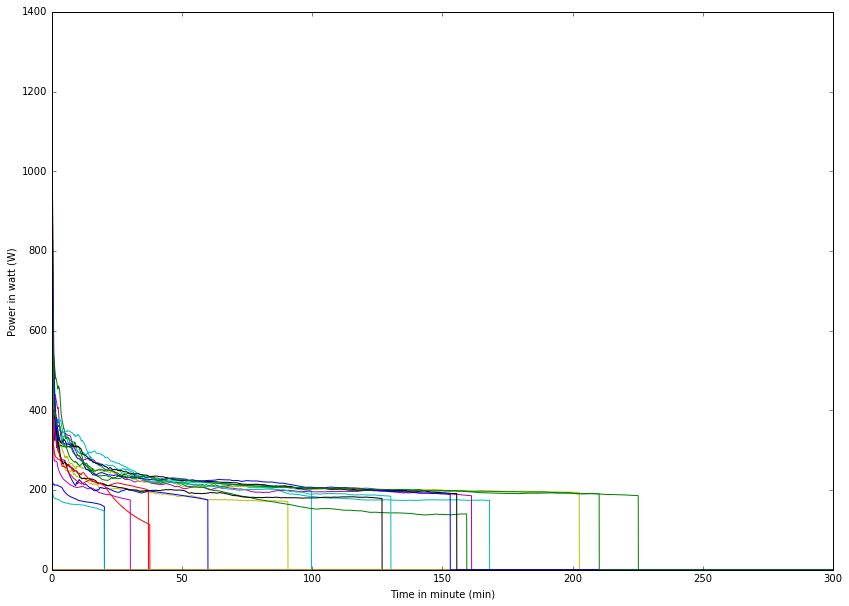

In [36]:
plt.figure(figsize=(14, 10))

for rpp in my_rider.rides_pp_:
    t = np.linspace(0, rpp.max_duration_profile_, rpp.data_.size)
    plt.plot(t, rpp.data_)
    plt.ylabel('Power in watt (W)')
    plt.xlabel('Time in minute (min)')

plt.show()

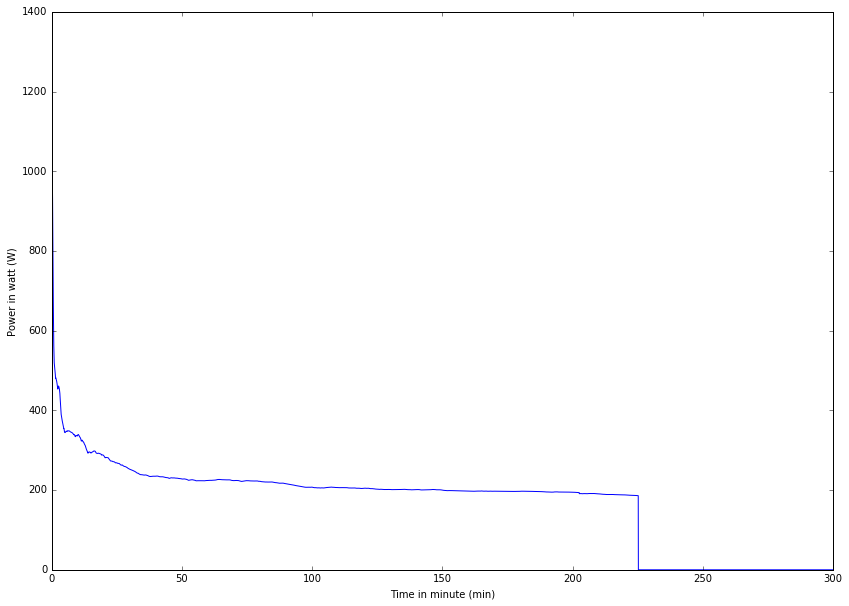

In [37]:
plt.figure(figsize=(14, 10))

# Force to compute the record power-profile
my_rider.compute_record_pp()

t = np.linspace(0, my_rider.max_duration_profile_, my_rider.record_pp_.data_.size)
plt.plot(t, my_rider.record_pp_.data_)
plt.ylabel('Power in watt (W)')
plt.xlabel('Time in minute (min)')

plt.show()

In [34]:
my_rider.save_to_pickles(filename)